In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
raw_data = pd.read_csv("dataset/HomeMortgageDisclosureActDataNY2015//ny_hmda_2015.csv")
raw_data.head()

/Users/thomo/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (15,16,17,31,32,33,34,42,43,44) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,action_taken,action_taken_name,agency_code,agency_abbr,agency_name,applicant_ethnicity,applicant_ethnicity_name,applicant_income_000s,applicant_race_1,applicant_race_2,...,state_abbr,state_name,hud_median_family_income,loan_amount_000s,number_of_1_to_4_family_units,number_of_owner_occupied_units,minority_population,population,rate_spread,tract_to_msamd_income
0,1,Loan originated,9,CFPB,Consumer Financial Protection Bureau,2,Not Hispanic or Latino,97.0,5,NaN,...,NY,New York,109000.0,187,363.0,1817.0,21.139999,5870.0,NaN,109.459999
1,1,Loan originated,9,CFPB,Consumer Financial Protection Bureau,2,Not Hispanic or Latino,200.0,5,NaN,...,NY,New York,71300.0,460,53.0,256.0,45.959999,3512.0,NaN,160.600006
2,1,Loan originated,7,HUD,Department of Housing and Urban Development,2,Not Hispanic or Latino,NaN,3,NaN,...,NY,New York,71300.0,296,2745.0,2586.0,38.990002,8357.0,NaN,134.820007
3,1,Loan originated,9,CFPB,Consumer Financial Protection Bureau,2,Not Hispanic or Latino,202.0,5,NaN,...,NY,New York,109000.0,770,1879.0,2147.0,7.350000,6642.0,NaN,165.830002
4,1,Loan originated,9,CFPB,Consumer Financial Protection Bureau,2,Not Hispanic or Latino,255.0,5,NaN,...,NY,New York,109000.0,648,835.0,676.0,30.059999,2339.0,NaN,133.300003


In [3]:
raw_data.shape

(439654, 78)

In [4]:
raw_data.columns

Index(['action_taken', 'action_taken_name', 'agency_code', 'agency_abbr',
       'agency_name', 'applicant_ethnicity', 'applicant_ethnicity_name',
       'applicant_income_000s', 'applicant_race_1', 'applicant_race_2',
       'applicant_race_3', 'applicant_race_4', 'applicant_race_5',
       'applicant_race_name_1', 'applicant_race_name_2',
       'applicant_race_name_3', 'applicant_race_name_4',
       'applicant_race_name_5', 'applicant_sex', 'applicant_sex_name',
       'application_date_indicator', 'as_of_year', 'census_tract_number',
       'co_applicant_ethnicity', 'co_applicant_ethnicity_name',
       'co_applicant_race_1', 'co_applicant_race_2', 'co_applicant_race_3',
       'co_applicant_race_4', 'co_applicant_race_5',
       'co_applicant_race_name_1', 'co_applicant_race_name_2',
       'co_applicant_race_name_3', 'co_applicant_race_name_4',
       'co_applicant_race_name_5', 'co_applicant_sex', 'co_applicant_sex_name',
       'county_code', 'county_name', 'denial_reason_1', 

In [5]:
raw_data["action_taken"].value_counts().sort_index()

1    228054
2     14180
3     79697
4     39496
5     16733
6     61490
7         4
Name: action_taken, dtype: int64

In [6]:
raw_data['action_taken_name'].value_counts()

Loan originated                                        228054
Application denied by financial institution             79697
Loan purchased by the institution                       61490
Application withdrawn by applicant                      39496
File closed for incompleteness                          16733
Application approved but not accepted                   14180
Preapproval request denied by financial institution         4
Name: action_taken_name, dtype: int64

In [7]:
filter1 = (raw_data['action_taken'] >= 1) & (raw_data['action_taken'] <= 3)
data = raw_data[filter1]
data.shape

(321931, 78)

In [8]:
freqs = data['action_taken'].value_counts()
freqs

1    228054
3     79697
2     14180
Name: action_taken, dtype: int64

In [9]:
overall_approval_rate = (freqs[1] + freqs[2]) / data.shape[0]
print("Overall approval rate:", overall_approval_rate)

Overall approval rate: 0.7524407404071058


In [10]:
data['applicant_sex'].value_counts()

1    195566
2     98112
3     21456
4      6797
Name: applicant_sex, dtype: int64

<AxesSubplot:>

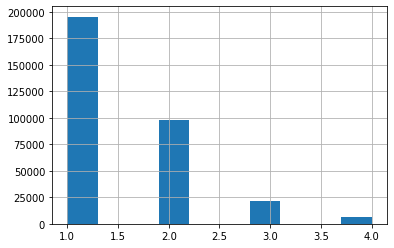

In [11]:
data['applicant_sex'].hist()

In [12]:
data['applicant_sex_name'].value_counts()

Male                                                                                 195566
Female                                                                                98112
Information not provided by applicant in mail, Internet, or telephone application     21456
Not applicable                                                                         6797
Name: applicant_sex_name, dtype: int64

In [13]:
filter2 = (data['applicant_sex_name'] == 'Male') | (data['applicant_sex_name'] == 'Female')
data = data[filter2]
data.shape

(293678, 78)

In [14]:
filter3 = (data['applicant_sex_name'] == 'Male')
data_male = data[filter3]
print("Male:", data_male.shape)

data_female = data[data['applicant_sex_name'] == 'Female']
print("Female:", data_female.shape)

Male: (195566, 78)
Female: (98112, 78)


In [15]:
freqs = data_male['action_taken'].value_counts()
approval_rate_male = (freqs[1] + freqs[2]) / data_male.shape[0]
print("Male approvale rate:", approval_rate_male)

freqs = data_female['action_taken'].value_counts()
approval_rate_female = (freqs[1] + freqs[2]) / data_female.shape[0]
print("Female approvale rate:", approval_rate_female)

Male approvale rate: 0.7634353619749854
Female approvale rate: 0.7408675799086758


In [16]:
data["applicant_race_1"].value_counts()

5    231698
2     22357
3     21949
6     15278
1      1353
4       991
7        52
Name: applicant_race_1, dtype: int64

<AxesSubplot:>

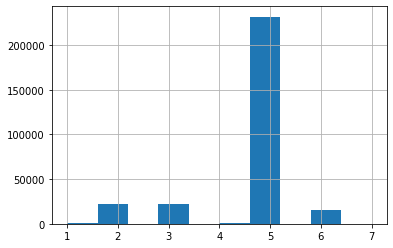

In [17]:
data["applicant_race_1"].hist()

In [18]:
data['applicant_race_name_1'].value_counts()

White                                                                                231698
Asian                                                                                 22357
Black or African American                                                             21949
Information not provided by applicant in mail, Internet, or telephone application     15278
American Indian or Alaska Native                                                       1353
Native Hawaiian or Other Pacific Islander                                               991
Not applicable                                                                           52
Name: applicant_race_name_1, dtype: int64

In [19]:
filter4 = (data['applicant_race_name_1'] == 'White') | (data['applicant_race_name_1'] == 'Asian') | (data['applicant_race_name_1'] == 'Black or African American') | (data['applicant_race_name_1'] == 'American Indian or Alaska Native') | (data['applicant_race_name_1'] == 'Native Hawaiian or Other Pacific Islander')
data = data[filter4]
data.shape

(278348, 78)

In [20]:

filter5 = (data['applicant_race_name_1'] == 'White')
data_White = data[filter5]
print("White:", data_White.shape)

data_Asian = data[data['applicant_race_name_1'] == 'Asian']
print("Asian:", data_Asian.shape)

data_Black_or_African_American = data[data['applicant_race_name_1'] == 'Black or African American']
print("Black or African American:", data_Black_or_African_American.shape)

data_American_Indian_or_Alaska_Native = data[data['applicant_race_name_1'] == 'American Indian or Alaska Native']
print("American Indian or Alaska Native:", data_American_Indian_or_Alaska_Native.shape)

data_Native_Hawaiian_or_Other_Pacific_Islander = data[data['applicant_race_name_1'] == 'Native Hawaiian or Other Pacific Islander']
print("Native Hawaiian or Other Pacific Islander:", data_Native_Hawaiian_or_Other_Pacific_Islander.shape)

White: (231698, 78)
Asian: (22357, 78)
Black or African American: (21949, 78)
American Indian or Alaska Native: (1353, 78)
Native Hawaiian or Other Pacific Islander: (991, 78)


In [21]:
freqs = data_White['action_taken'].value_counts()
approval_rate_White = (freqs[1] + freqs[2]) / data_White.shape[0]
print("White approval rate:", approval_rate_White)

freqs = data_Asian['action_taken'].value_counts()
approval_rate_Asian = (freqs[1] + freqs[2]) / data_Asian.shape[0]
print("Asian approval rate:", approval_rate_Asian)

freqs = data_Black_or_African_American['action_taken'].value_counts()
approval_rate_Black_or_African_American = (freqs[1] + freqs[2]) / data_Black_or_African_American.shape[0]
print("Black_or_African_American approval rate:", approval_rate_Black_or_African_American)

freqs = data_American_Indian_or_Alaska_Native['action_taken'].value_counts()
approval_rate_American_Indian_or_Alaska_Native = (freqs[1] + freqs[2]) / data_American_Indian_or_Alaska_Native.shape[0]
print("American_Indian_or_Alaska_Native approval rate:", approval_rate_American_Indian_or_Alaska_Native)

freqs = data_Native_Hawaiian_or_Other_Pacific_Islander['action_taken'].value_counts()
approval_rate_Native_Hawaiian_or_Other_Pacific_Islander = (freqs[1] + freqs[2]) / data_Native_Hawaiian_or_Other_Pacific_Islander.shape[0]
print("Native_Hawaiian_or_Other_Pacific_Islander approval rate:", approval_rate_Native_Hawaiian_or_Other_Pacific_Islander)

White approval rate: 0.7795319769700213
Asian approval rate: 0.7591358411235855
Black_or_African_American approval rate: 0.6136498245933756
American_Indian_or_Alaska_Native approval rate: 0.5225424981522543
Native_Hawaiian_or_Other_Pacific_Islander approval rate: 0.6195761856710393


In [22]:
def get_tax_bracket(income):
    """
    Tax brackets 2020:
    9875, 40125, 85525, 163300, 207350, 518400
    """
    if income < 9.875:
        return 0
    elif income < 40.125:
        return 1
    elif income < 85.525:
        return 2
    elif income < 163.3:
        return 3
    elif income < 207.35:
        return 4
    elif income < 518.4:
        return 5
    else:
        return 6
def tax_Bracket_Name (tax_bracket):
    """
    
    9875, 40125, 85525, 163300, 207350, 518400
    
    """
        
    if tax_bracket == 0:
        return 'Income (0) < 9875'
    elif tax_bracket == 1:
        return 'Income (1) < 40,125'
    elif tax_bracket == 2:
        return 'Income (2) < 85,525'
    elif tax_bracket == 3:
        return 'Income (3) < 163,300'
    elif tax_bracket == 4:
        return 'Income (4) < 207,350'
    elif tax_bracket == 5:
        return 'Income (5) < 518,400'
    elif tax_bracket == 6:
        return 'Income (6) > 518,400'
    else:
        return 'Not a Number'
    
data_income = raw_data.copy()
data_income_name = data_income.copy()
data_income['tax_bracket'] = data_income['applicant_income_000s'].apply(get_tax_bracket)
data_income_name['tax_bracket_name'] = data_income['tax_bracket'].apply(tax_Bracket_Name)
data_income['tax_bracket'].value_counts().sort_index()

0       996
1     41945
2    134848
3    127397
4     25644
5     37157
6     71667
Name: tax_bracket, dtype: int64

Income (0) < 9875: (231698, 78)
Income (1) < 40,125: (31582, 78)
Income (2) < 85,525: (96063, 78)


<ipython-input-23-5ada5c1fe2db>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_Income_40125 = data[data_income_name['tax_bracket_name']       == 'Income (1) < 40,125']
<ipython-input-23-5ada5c1fe2db>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_Income_85525 = data[data_income_name['tax_bracket_name']       == 'Income (2) < 85,525']
<ipython-input-23-5ada5c1fe2db>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_Income_163300 = data[data_income_name['tax_bracket_name']      == 'Income (3) < 163,300']


Income (3) < 163,300: (87252, 78)
Income (4) < 207,350: (17022, 78)
Income (5) < 518,400: (24472, 78)
Income (6) > 518,400: (21218, 78)


<ipython-input-23-5ada5c1fe2db>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_Income_207350 = data[data_income_name['tax_bracket_name']      == 'Income (4) < 207,350']
<ipython-input-23-5ada5c1fe2db>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_Income_518400 = data[data_income_name['tax_bracket_name']      == 'Income (5) < 518,400']
<ipython-input-23-5ada5c1fe2db>:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_Income_over_518400 = data[data_income_name['tax_bracket_name'] == 'Income (6) > 518,400']


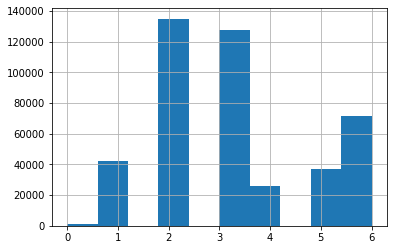

In [23]:
data_income['tax_bracket'].hist()
data_income_name['tax_bracket_name'].value_counts().sort_index()

filter6 = (data_income_name['tax_bracket_name']                     == 'Income (0) < 9875')
data_Income_9875 = data[filter5]
print("Income (0) < 9875:", data_Income_9875.shape)

data_Income_40125 = data[data_income_name['tax_bracket_name']       == 'Income (1) < 40,125']
print("Income (1) < 40,125:", data_Income_40125.shape)

data_Income_85525 = data[data_income_name['tax_bracket_name']       == 'Income (2) < 85,525']
print("Income (2) < 85,525:", data_Income_85525.shape)

data_Income_163300 = data[data_income_name['tax_bracket_name']      == 'Income (3) < 163,300']
print("Income (3) < 163,300:", data_Income_163300.shape)

data_Income_207350 = data[data_income_name['tax_bracket_name']      == 'Income (4) < 207,350']
print("Income (4) < 207,350:", data_Income_207350.shape)

data_Income_518400 = data[data_income_name['tax_bracket_name']      == 'Income (5) < 518,400']
print("Income (5) < 518,400:", data_Income_518400.shape)

data_Income_over_518400 = data[data_income_name['tax_bracket_name'] == 'Income (6) > 518,400']
print("Income (6) > 518,400:", data_Income_over_518400.shape)

In [24]:

filter6 = (data_income_name['tax_bracket_name']                     == 'Income (0) < 9875')
data_Income_9875 = data[filter5]
print("Income (0) < 9875:", data_Income_9875.shape)

data_Income_40125 = data[data_income_name['tax_bracket_name']       == 'Income (1) < 40,125']
print("Income (1) < 40,125:", data_Income_40125.shape)

data_Income_85525 = data[data_income_name['tax_bracket_name']       == 'Income (2) < 85,525']
print("Income (2) < 85,525:", data_Income_85525.shape)

data_Income_163300 = data[data_income_name['tax_bracket_name']      == 'Income (3) < 163,300']
print("Income (3) < 163,300:", data_Income_163300.shape)

data_Income_207350 = data[data_income_name['tax_bracket_name']      == 'Income (4) < 207,350']
print("Income (4) < 207,350:", data_Income_207350.shape)

data_Income_518400 = data[data_income_name['tax_bracket_name']      == 'Income (5) < 518,400']
print("Income (5) < 518,400:", data_Income_518400.shape)

data_Income_over_518400 = data[data_income_name['tax_bracket_name'] == 'Income (6) > 518,400']
print("Income (6) > 518,400:", data_Income_over_518400.shape)

Income (0) < 9875: (231698, 78)
Income (1) < 40,125: (31582, 78)
Income (2) < 85,525: (96063, 78)


<ipython-input-24-4aed93ee41ee>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_Income_40125 = data[data_income_name['tax_bracket_name']       == 'Income (1) < 40,125']
<ipython-input-24-4aed93ee41ee>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_Income_85525 = data[data_income_name['tax_bracket_name']       == 'Income (2) < 85,525']
<ipython-input-24-4aed93ee41ee>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_Income_163300 = data[data_income_name['tax_bracket_name']      == 'Income (3) < 163,300']


Income (3) < 163,300: (87252, 78)
Income (4) < 207,350: (17022, 78)
Income (5) < 518,400: (24472, 78)
Income (6) > 518,400: (21218, 78)


<ipython-input-24-4aed93ee41ee>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_Income_207350 = data[data_income_name['tax_bracket_name']      == 'Income (4) < 207,350']
<ipython-input-24-4aed93ee41ee>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_Income_518400 = data[data_income_name['tax_bracket_name']      == 'Income (5) < 518,400']
<ipython-input-24-4aed93ee41ee>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_Income_over_518400 = data[data_income_name['tax_bracket_name'] == 'Income (6) > 518,400']


In [25]:
freqs = data_Income_9875['action_taken'].value_counts()
approval_Income_9875 = (freqs[1] + freqs[2]) / data_Income_9875.shape[0]
print("Income (0) < 9875 approval rate:", approval_Income_9875)

freqs = data_Income_40125['action_taken'].value_counts()
approval_Income_40125 = (freqs[1] + freqs[2]) / data_Income_40125.shape[0]
print("Income (1) < 40,125 approval rate:", approval_Income_40125)

freqs = data_Income_85525['action_taken'].value_counts()
approval_Income_85525 = (freqs[1] + freqs[2]) / data_Income_85525.shape[0]
print("Income (2) < 85,525 approval rate:", approval_Income_85525)

freqs = data_Income_163300['action_taken'].value_counts()
approval_Income_163300 = (freqs[1] + freqs[2]) / data_Income_163300.shape[0]
print("Income (3) < 163,300 approval rate:", approval_Income_163300)

freqs = data_Income_207350['action_taken'].value_counts()
approval_Income_207350 = (freqs[1] + freqs[2]) / data_Income_207350.shape[0]
print("Income (4) < 207,350 approval rate:", approval_Income_207350)

freqs = data_Income_518400['action_taken'].value_counts()
approval_Income_518400 = (freqs[1] + freqs[2]) / data_Income_518400.shape[0]
print("Income (5) < 518,400 approval rate:", approval_Income_518400)

freqs = data_Income_over_518400['action_taken'].value_counts()
approval_Income_over_518400 = (freqs[1] + freqs[2]) / data_Income_over_518400.shape[0]
print("Income (6) > 518,400 approval rate:", approval_Income_over_518400)

Income (0) < 9875 approval rate: 0.7795319769700213
Income (1) < 40,125 approval rate: 0.6295991387499208
Income (2) < 85,525 approval rate: 0.7545256758585511
Income (3) < 163,300 approval rate: 0.8042910191170403
Income (4) < 207,350 approval rate: 0.8191751850546352
Income (5) < 518,400 approval rate: 0.8269450800915332
Income (6) > 518,400 approval rate: 0.7267885757375813
